### Collaborated with Joe Gyorda, Anton Hung, and Digvijay Yadav on some parts of the assignment. Use of ChatGPT is indicated when used
### 1. (10 pts) Write a loss function that can be used for each of the models below. Please write down the formulas. No coding is required.

L2-Regularized Linear Regression

$$J(W) = \frac{1}{n} \sum_{i=1}^n (f(x_i,W) - y_i)^2 + \lambda \sum_{i=1}^m w_i^2$$

L1-Regularized Logistic Regression

$$J(W) = -\frac{1}{n} \sum_{i=1}^n \left[y_i\log(p_i) + (1-y_i)\log(1-p_i)\right] + \lambda \sum_{i=1}^m |w_j|$$

### 2. (5 pts) You are working on a binary classification task using a dataset with 10,000 features. Which logistic regression model (unregularized, L2, or L1) and parameters (lambda high or low) would be most useful for determining a small set of parameters that are most important for classification? Please provide the reason(s) of your choice.

When working on a binary clsasification task with a 10,000 feature dataset, L1 logistic regression would be more useful for determining a small set of parameters most useful for classification. Given the Laplace prior L1 regularization puts on the parameters, many of the unimportant parameters are set to 0. The gaussian prior on parameters shrinks the less important features but does not set them to zero. The L2 model would be robust but hard to interpret given that there would be too many features to interpret in the model. In a dataset with 10,000 features, it is better to focus on the more important features, which is done in L1 regularization. A higher lambda would be better because this dataset contains many features and in order to make the model more interpretable, a few of the most informative predictors would likely be selected with a high lambda (higher penalty).

### 3. (30 pts) In this part, you are asked to create a Python class from scratch for logistic regression. Your code must implement the stochastic gradient descent algorithm for parameter update. As a reminder, the stochastic gradient descent for each parameter can be formulated as
wk ←wk −α[(hw⃗(x⃗i)−yi)xi,k +λwk]
where i refers to ith sample, wk refers to kth parameter (i.e., weight), xi,k refers to kth feature of sample i, α is the step size, yi is the output label for sample i, λ is the regularization parameter, and h(x⃗)= 1 = 1
w⃗ i 1 + e−w⃗T x⃗i 1 + e−Σpk=1(xi,kwk) where w⃗T indicates the transpose of current weight vector, and p is the total number of paramters.

### (15 pts) Implement a L2-regularized logistic regression model that trains using stochastic gradient descent and returns the loss history from 500 epochs of training. You should use the starter code provided below and complete the missing part (indicated as <MISSING>).


In [2]:
#import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
class LogisticGD:
    def __init__(self, num_vars=100, lr=0.01, l2=0.001):
        # initiate model weights here
        self.w = np.zeros(num_vars)
        # initiate bias
        self.b = np.zeros(num_vars)
        # other things to remember 
        self.num_vars = num_vars 
        self.lr = lr
        self.l2 = l2
        
    def get_loss(self, X, y, mode='train'):
        # 1. calculate the model prediction (Wx +b)
        h = np.dot(self.w.T,X) + self.b
        # 2. calculate the outcome probability using sigmoid function 
        p = 1/(1+np.exp(-h))
        # 3. calculate the loss
        if mode == 'train':
            # calculate the regularized loss 
            #added small value to log term to avoid log(0) error
            l = -(y*np.log(p+0.0000001)+(1-y)*np.log(1-p+0.0000001)) + (self.l2 * np.sum(self.w**2))
        else:
            # calculate the unregularized loss
            l = -(y*np.log(p+0.0000001)+(1-y)*np.log(1-p+0.0000001))
        # 4. store some intermediate results to be used in the update function
        self.p = p 
        self.y = y 
        self.X = X 
        return l

    def update(self): 
        ############### 
        # implement the gradient descent here
        # you can use some of the intermediate results that
        # stored by loss function
        ###############
        # 1. calculate the gradient (used https://stats.stackexchange.com/questions/278771/
        #how-is-the-cost-function-from-logistic-regression-differentiated for help)
        partial_w = np.dot(self.X.T, (self.p - self.y)) + 2*self.l2*self.w 
        partial_b =self.p - self.y
        # 2. update the weights
        self.w = self.w - self.lr * partial_w
        self.b = self.b - self.lr * partial_b
    
    def fit(self, Xtrain, Ytrain, Xval, Yval, num_epochs=500): 
        # first save some information
        num_examples_tr , num_vars = Xtrain.shape 
        num_examples_val = Xval.shape[0]
        assert num_vars == self.num_vars 
        loss_tr = []
        loss_val = []
    
        loss_history = np.zeros([num_epochs , 2])
    
        for epoch in range(num_epochs):
        # implement the training step 
            for i in range(num_examples_tr):
                #take x and y values of each data point and calculate loss
                xi = Xtrain.iloc[i,:]
                yi = Ytrain.iloc[i]
                loss_tr.append(self.get_loss(xi, yi))
                self.update()

            # implement the validation step 
            for i in range(num_examples_val):
                xi = Xval.iloc[i,:]
                yi = Yval.iloc[i]
                loss_val.append(self.get_loss(xi, yi, mode='eval'))
            # save the training loss and validation loss to loss_history
            loss_history[epoch,0] = np.mean(loss_tr) 
            loss_history[epoch,1] = np.mean(loss_val)
        return loss_history

Split the development data into training data and validation data. You should not use the test data at this stage.

In [3]:
import pandas as pd
dev = pd.read_csv('data_dev.csv')
y_dev = dev.iloc[:,-1]
X_dev = dev.iloc[:,:-1]
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=3)

(5 pts) Train the model using 5 or more different learning rates and set the L2 regularization to 1.0. Plot the training and validation loss curves. Describe and explain your findings.

In [4]:
import matplotlib.pyplot as plt
learning_rates = [0.1,0.05,0.001,0.005,0.0001]
results = {}

for i in learning_rates:
    print(i)
    model = LogisticGD(lr =i, l2 = 1.0)
    loss_history = model.fit(X_train, y_train, X_val, y_val)
    results[i] = loss_history

0.1
0.05
0.001
0.005
0.0001


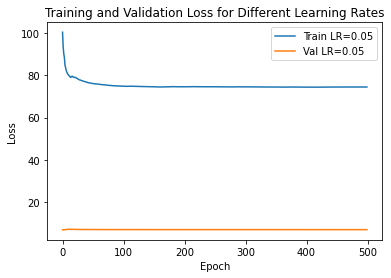

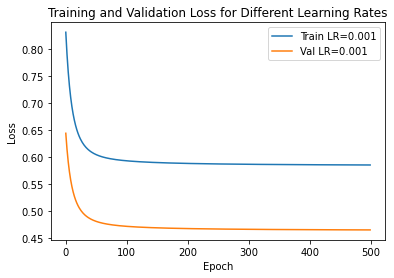

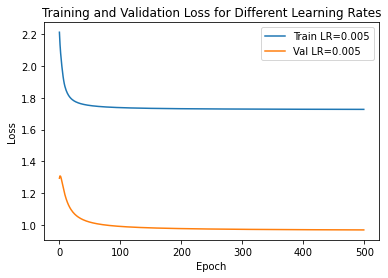

In [43]:
for lr, loss_history in results.items():
    plt.plot(loss_history[:, 0], label=f"Train LR={lr}")
    plt.plot(loss_history[:, 1], label=f"Val LR={lr}")
    plt.title("Training and Validation Loss for Different Learning Rates")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

Starting at the highest learning rate, 0.1, the training set loss is very high while the validation loss is very low. This may indicate that something is wrong with the loss function as this does not make inutitive sense. However, as the learning rate decreases, the curves get close together, and when the loss gets to 0.0001, the loss of the training set goes down significantly and is close to the validation set. The loss also appears to go down with each epoch, which indicates that the loss function is being minimized. 0.0001 is the best learning rate according to the plots.

In [47]:
best_lr = 0.0001
import matplotlib.pyplot as plt
lambdas = [0.1,1,10,100,1000]
results = {}

for l in lambdas:
    print(l)
    model = LogisticGD(lr =best_lr, l2 = l)
    loss_history = model.fit(X_train, y_train, X_val, y_val)
    results[l] = loss_history

0.1
1
10
100
1000


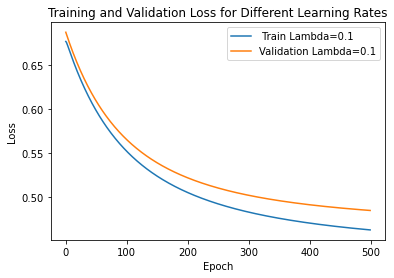

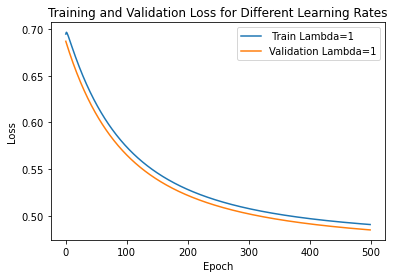

In [52]:
for l2, loss_history in results.items():
    plt.plot(loss_history[:, 0], label=f" Train Lambda={l2}")
    plt.plot(loss_history[:, 1], label=f"Validation Lambda={l2}")
    plt.title("Training and Validation Loss for Different Learning Rates")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

As lambda decreases, the training loss alnd validation loss get closer together. This indicates that smaller lambda value values give a model that can better be applied to the validation set. However, the validation loss is lower than the training loss in all cases, which is likely due to an error in the calculation of the loss function. As lambda goes below one, the loss begins to get higher again, indicating that one is the best lambda value as this value is associated with the lowest loss for both the training and validation set. 

0.004416349531205838
0.9354894108262494


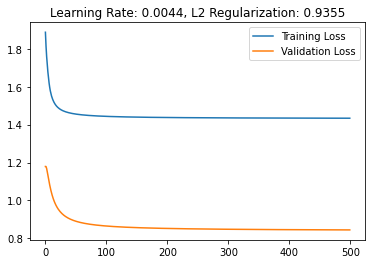

0.0003566696950961242
0.7984217204727883


0.005541658530999221
0.210524118563951


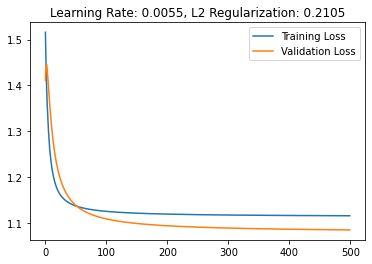

0.0044096916869209414
0.7752314006859622


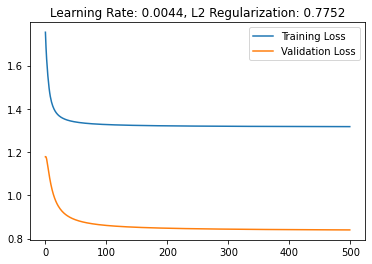

0.004261641240666142
0.28481539981390375


0.003370314727938354
1.1801493702468435


0.002126021476974641
1.2824231860328383


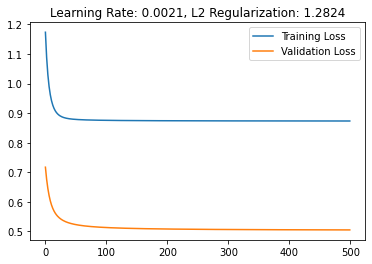

0.006230782566871571
0.7464128876990724


0.0030665812693777793
1.2713766131826274


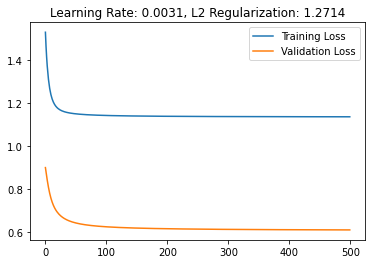

0.00274159002351838
0.1286717607435009


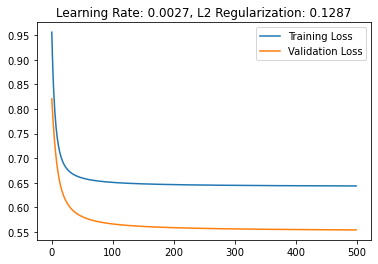

In [14]:
import random
# Generate random hyperparameters
np.random.seed(2)
learning_rates = np.random.uniform(low=0.0001, high=0.01, size=10)
l2_regularizations = np.random.uniform(low=0.01, high=1.5, size=10)

# Train the model for each pair of hyperparameters
for i in range(10):
    print(learning_rates[i])
    print(l2_regularizations[i])
    # Initialize the model with the current pair of hyperparameters
    model = LogisticGD(lr=learning_rates[i], l2=l2_regularizations[i])
    
    # Train the model for 500 epochs
    loss_history = model.fit(Xtrain=X_train, Ytrain=y_train, Xval=X_val, Yval=y_val)
    
    # Plot the training and validation loss curves
    plt.plot(loss_history[:,0], label='Training Loss')
    plt.plot(loss_history[:,1], label='Validation Loss')
    plt.title('Learning Rate: {:.4f}, L2 Regularization: {:.4f}'.format(learning_rates[i], l2_regularizations[i]))
    plt.legend()
    plt.show()

The best hyperparameters are a learning rate of 0.0004 and a l2 lambda value of 0.7984. These hyperparameters are associated with the lowest loss for both training and validation. Also, the training and validation curves are relatively close together, indicating the model performs well on the validation set. 

### 4.  You are asked to find the best lambda for L2 regularization from 10 candidate values. We recommend that you use the LogisticRegression module from sklearn.linear_model for model building and fitting from now on.

1. Generate 10 candidate lambda values.

In [15]:
#Asked ChatGPT "Which lambda value values should I pick and why?"
import numpy as np

lambdas = np.logspace(0, 4, 10)
#picked these because lambdas on a log scale cover a large range of possible lambdas

In [16]:
lambdas

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

 2. Randomly split the development dataset into training/validation parts, and find the best L2 lambda based on validation AUROC score.

In [17]:
#read in the data
import pandas as pd
dev = pd.read_csv('data_dev.csv')
#take outcome out
y_dev = dev.iloc[:,-1]
X_dev = dev.iloc[:,:-1]

In [18]:
#run logistgic regression with each lambda value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=1)
#initiate best values
best_lambda = None
best_auc = 0

for lambda_value in lambdas:
    # asked chatgpt "how to implement logistic regression from scikitlearn and explain the parameterrs"
    model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='lbfgs',  max_iter = 1000, random_state=1)

    # Training the model on the training set
    model.fit(X_train, y_train)

    # Calculating the AUROC score on the validation set
    #probabilities of being in positive class
    y_prob = model.predict_proba(X_val)[:, 1]
    #compare these probabilities with actual values
    auc = roc_auc_score(y_val, y_prob)

    # Updating the best lambda and best AUROC score if necessary
    if auc > best_auc:
        best_auc = auc
        best_lambda = lambda_value


In [19]:
print(f'best lambda:{best_lambda}')
print(f'best AUROC:{best_auc}')

best lambda:166.81005372000593
best AUROC:0.8205980066445183


3. Repeat step 2 for a total of 5 times.

In [20]:
#need to do this 5 times now
num_folds = 5

# Initialize best lambda and best AUROC score lists
best_lambdas = []
best_aucs = []
rand = 1
for fold in range(num_folds):
    
    # Splita dataset into training and validation, changing random state each loop
    X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2,random_state = rand)
    
    # Reset best lambda score and best auc score
    
    fold_best_lambda = None
    fold_best_auc = 0
    rand +=1
    # Train logistic regression models with different lambda values on training set like in previous part
    for lambda_value in lambdas:
        # Creating a logistic regression model with L2 regularization
        rand_2= 1
        model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='lbfgs', max_iter =1000, random_state = rand_2)

        # Training the model on the training set
        model.fit(X_train, y_train)

        # Calculating the AUROC score on the validation set
        y_prob = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_prob)

        # Updating scores
        if auc > fold_best_auc:
            fold_best_auc = auc
            fold_best_lambda = lambda_value
        rand_2+=1
            
    # Append best lambda and best AUROC score for this fold to the lists
    best_lambdas.append(fold_best_lambda)
    best_aucs.append(fold_best_auc)

print(f'Best lambdas: {best_lambdas}')
print(f'Best AUROCs: {best_aucs}')


Best lambdas: [166.81005372000593, 464.15888336127773, 1291.5496650148827, 10000.0, 166.81005372000593]
Best AUROCs: [0.8205980066445183, 0.7740863787375416, 0.7920054200542006, 0.7540650406504065, 0.7140921409214092]


4. Comment on your findings. Specifically, does the best validation AUROC score and its corresponding L2 lambda consistent across each repeat? How to explain your findings?

The best validation AUROC score corresponds with the higher lambda values close to 1000. The results are not too consistent as there is only one lambda value that is picked tiwce. The difference can be explained by the way the data is split. Each split has a different training and validation set, which can change how the model performs and which lambda penalty is the best. However, in all cases, the lambda value is close to 1000 on the log scale.

### 5. (20 pts) Please implement a pipeline for 5-fold cross-validation. Note that using sklearn.model_selection is NOT allowed for this part. We recommend that you use the LogisticRegression module from sklearn.linear_model for model building and fitting.

In [21]:
def cross_validation(X, y, lambdas):
    '''
    Function implements 5 fold cross validation
    '''
    #conver to numpy arrays to make working with easier
    X = X.values
    y = y.values
    num_folds = 5
    #Each fold should separate the data into fifths
    fold_size = int(X.shape[0] / num_folds)
    aurocs = []
    coefs = []
    #same approach as last time but just need to make folds
    for lambda_value in lambdas:
        fold_aurocs = []
        fold_coefs = []
        rand = 1
        for fold in range(num_folds):
            # Split data into train and validation 
            #indeces of start of fold should change by the size of the fold each time
            val_start_idx = fold * fold_size
            #indeces should end by the difference of one fold
            val_end_idx = (fold + 1) * fold_size
            #extract indeces from these folds into validation set
            X_val = X[val_start_idx:val_end_idx, :]
            y_val = y[val_start_idx:val_end_idx]
            #put everything into training set
            X_train = np.concatenate((X[:val_start_idx], X[val_end_idx:]))
            y_train = np.concatenate((y[:val_start_idx], y[val_end_idx:]))
            
            # Train model with L2 regularization similar to last question
            model = LogisticRegression(penalty='l2', C=1/lambda_value, random_state=rand, max_iter=5000)
            model.fit(X_train, y_train)
            rand += 1
            # Evaluate model on validation fold similar to last question
            y_prob = model.predict_proba(X_val)[:, 1]
            fold_aurocs.append(roc_auc_score(y_val, y_prob))
            fold_coefs.append(model.coef_[0])
        
        aurocs.append(np.mean(fold_aurocs))
        coefs.append(np.mean(fold_coefs, axis=0))
    
    return aurocs, coefs



In [22]:
#extract auroc scores and coefficients from model
auroc_scores_l2,coeffs_l2 = (cross_validation(X_dev, y_dev,lambdas)[0],cross_validation(X_dev, y_dev,lambdas)[1:])
auroc_scores_l2

[0.6668920019924454,
 0.68272949422226,
 0.7047491878817742,
 0.7289081180972377,
 0.7537573431489678,
 0.7723052486577858,
 0.781496412781384,
 0.7792449345564828,
 0.7743911825024813,
 0.7703651965926495]

In [24]:
#note that the axis is log scaled to better see the trend
import matplotlib.pyplot as plt
plt.plot(lambdas, auroc_scores_l2)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('AUROC')
plt.title('L2 regularization and model performance')
plt.show()


As the lambda value increases, the model performs better. Lambda values around 1000 had the best performance. However, it appears that after 1000, the tuning parameter becomes too large and the performance of the model begins to get worse.

Text(0, 0.5, 'Coefficients')

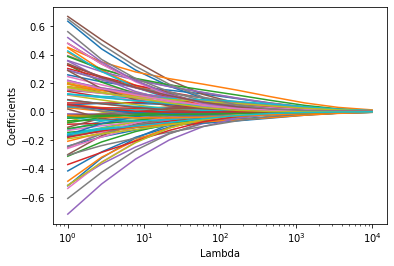

In [25]:
#plots coefficient as a function of lambda
fig, ax = plt.subplots()

for i in range(len(coeffs_l2)):
    ax.plot(lambdas,coeffs_l2[i], label=f'Lambda: {lambdas[i]}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
    

As lambda increases, the coefficients begin to shrink. Some features shrink faster than others and some shrink to near zero. Overall, the coefficients shrink as the lambda value increases

### 6. (15 pts) Repeat the previous part using L1 regularization and elastic net regularization. For elastic net, you can fix the l1_ratio at 0.5.

L1 Regularization: 

In [26]:
def cross_validation_l1(X, y, lambdas):
    '''
    Function implements 5 fold cross validation
    '''
    #conver to numpy arrays to make working with easier
    X = X.values
    y = y.values
    num_folds = 5
    #Each fold should separate the data into fifths
    fold_size = int(X.shape[0] / num_folds)
    aurocs = []
    coefs = []
    
    for lambda_value in lambdas:
        fold_aurocs = []
        fold_coefs = []
        for fold in range(num_folds):
            # Split data into train and validation 
            #indeces of start of fold should change by the size of the fold each time
            val_start_idx = fold * fold_size
            #indeces should end by the difference of one fold
            val_end_idx = (fold + 1) * fold_size
            #extract indeces from these folds into validation set
            X_val = X[val_start_idx:val_end_idx, :]
            y_val = y[val_start_idx:val_end_idx]
            #put everything into training set
            X_train = np.concatenate((X[:val_start_idx], X[val_end_idx:]))
            y_train = np.concatenate((y[:val_start_idx], y[val_end_idx:]))
            
            rand = 1
            # Train model with L1 regularization (Did not work when ran, so asked ChatGPT "what solver to use w/L1")
            model = LogisticRegression(penalty='l1', solver = 'liblinear', C=1/lambda_value, random_state=rand, max_iter=5000)
            model.fit(X_train, y_train)
            rand += 1
            # Evaluate model on validation fold similar to last question
            y_prob = model.predict_proba(X_val)[:, 1]
            fold_aurocs.append(roc_auc_score(y_val, y_prob))
            fold_coefs.append(model.coef_[0])
        
        aurocs.append(np.mean(fold_aurocs))
        coefs.append(np.mean(fold_coefs, axis=0))
    
    return aurocs, coefs



In [27]:
#extract auroc scores and coefficients from model
auroc_scores_l1,coeffs_l1 = (cross_validation_l1(X_dev, y_dev,lambdas)[0],cross_validation(X_dev, y_dev,lambdas)[1:])
auroc_scores_l1

[0.6879310033200567,
 0.7238587637142415,
 0.7703219544970767,
 0.7726743061033392,
 0.7567401136445254,
 0.7166199298107584,
 0.5,
 0.5,
 0.5,
 0.5]

In [29]:
#note that the axis is log scaled to better see the trend
import matplotlib.pyplot as plt
plt.plot(lambdas, auroc_scores_l1)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('AUROC')
plt.title('L1 regularization and model performance')
plt.show()

Text(0, 0.5, 'Coefficients')

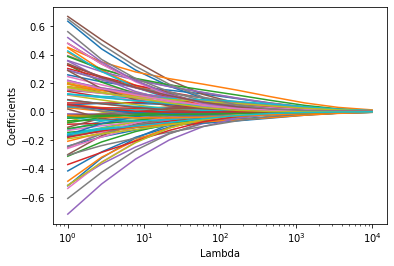

In [30]:
fig, ax = plt.subplots()

for i in range(len(coeffs_l1)):
    ax.plot(lambdas,coeffs_l1[i], label=f'Lambda: {lambdas[i]}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')

As lambda increases, the coefficients begin to shrink. Some features shrink faster than others and some shrink to near zero. Overall, the coefficients shrink as the lambda value increases

In [31]:
from sklearn.linear_model import ElasticNet
def cross_validation_elasticnet(X, y, lambdas):
    '''
    Function implements 5 fold cross validation
    '''
    # Convert to numpy arrays to make working with easier
    X = X.values
    y = y.values
    num_folds = 5
    # Each fold should separate the data into fifths
    fold_size = int(X.shape[0] / num_folds)
    aurocs = []
    coefs = []

    for lambda_value in lambdas:
        fold_aurocs = []
        fold_coefs = []
        for fold in range(num_folds):
            # Split data into train and validation
            # Indeces of start of fold should change by the size of the fold each time
            val_start_idx = fold * fold_size
            # Indeces should end by the difference of one fold
            val_end_idx = (fold + 1) * fold_size
            # Extract indeces from these folds into validation set
            X_val = X[val_start_idx:val_end_idx, :]
            y_val = y[val_start_idx:val_end_idx]
            # Put everything into training set
            X_train = np.concatenate((X[:val_start_idx], X[val_end_idx:]))
            y_train = np.concatenate((y[:val_start_idx], y[val_end_idx:]))

            rand = 1
            # Train model with Elastic Net regularization 
            #Asked ChatGPT "How to implement ElasticNet in LogisticRegression funtcion"
            model = ElasticNet(l1_ratio=0.5, alpha=1/lambda_value, random_state=rand, max_iter=5000)
            model.fit(X_train, y_train)
            rand += 1
            # Evaluate model on validation fold
            y_prob = model.predict(X_val)
            fold_aurocs.append(roc_auc_score(y_val, y_prob))
            fold_coefs.append(model.coef_)

        aurocs.append(np.mean(fold_aurocs))
        coefs.append(np.mean(fold_coefs, axis=0))

    return aurocs, coefs


In [32]:
#extract auroc scores and coefficients from model
auroc_scores_el,coeffs_el = (cross_validation_elasticnet(X_dev, y_dev,lambdas)[0],cross_validation(X_dev, y_dev,lambdas)[1:])
auroc_scores_el

[0.5,
 0.6754731303099936,
 0.7587467820866163,
 0.7617826151339206,
 0.7341991759553687,
 0.7150643095251248,
 0.7095114074924018,
 0.7068312821992253,
 0.7059014995582837,
 0.7060835756374944]

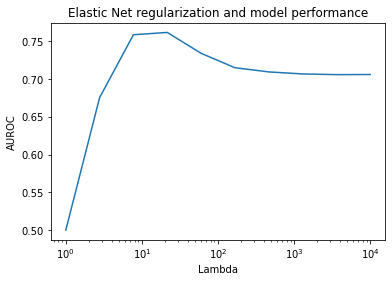

In [34]:
#note that the axis is log scaled to better see the trend
import matplotlib.pyplot as plt
plt.plot(lambdas, auroc_scores_el)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('AUROC')
plt.title('Elastic Net regularization and model performance')
plt.show()

Text(0, 0.5, 'Coefficients')

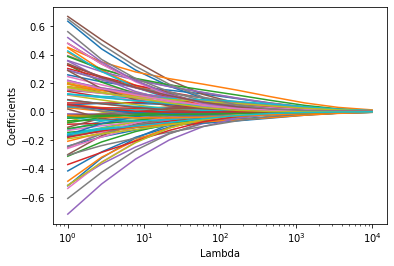

In [35]:
fig, ax = plt.subplots()

for i in range(len(coeffs_el)):
    ax.plot(lambdas,coeffs_el[i], label=f'Lambda: {lambdas[i]}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')

### 7.(10 pts) Choose the best logistic regression model from previous steps (question 5 and 6) and evaluate it on the test dataset. Your evaluation should include the following metrics: a confusion matrix, accuracy, F1 score, and AUROC/ROC curve.

In [36]:
#Find best AUROC
#first find which regularization method was best
print(max(auroc_scores_l1))
print(max(auroc_scores_l2))
print(max(auroc_scores_el))
#l2 had the best score

0.7726743061033392
0.781496412781384
0.7617826151339206


In [37]:
#determine the lambda value associated with the max auroc for l2
print(lambdas)
print(auroc_scores_l2)
#max lambda = 464.16

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]
[0.6668920019924454, 0.68272949422226, 0.7047491878817742, 0.7289081180972377, 0.7537573431489678, 0.7723052486577858, 0.781496412781384, 0.7792449345564828, 0.7743911825024813, 0.7703651965926495]


In [38]:
#implement the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

model = LogisticRegression(penalty='l2', C=1/464.16, random_state=1, max_iter=5000)
model.fit(X_dev, y_dev)
#import the data
test = pd.read_csv('data_test.csv')
y_test = test.iloc[:,-1]
X_test = test.iloc[:,:-1]
# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance, asked ChatGPT "How to 
#implement a confusion matrix, accuracy, F1 score, and AUROC/ROC curve in scikitlearn"
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_prob)

print(f'confusion matrix:{confusion}')
print(f'accuracy:{accuracy}')
print(f'f1 score:{f1}')
print(f'auroc:{auroc}')
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show


confusion matrix:[[ 13  47]
 [  2 238]]
accuracy:0.8366666666666667
f1 score:0.9066666666666667
auroc:0.8150694444444446


<function matplotlib.pyplot.show(close=None, block=None)>